In [6]:
import os
import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [18]:
def load_history(filepath):
    data = pd.read_csv(filepath, sep="\s+", header=None)
    data.columns = ["timestep", "replica_idx", "temperature", "potential"]
    return data

def load_history_files(data_dir, filename_match="trimer_abeta42.job*.sort.history"):
    filepaths = glob.glob(os.path.join(data_dir, filename_match))
    #print("filepaths:", filepaths)
    dfs = []
    for filepath in filepaths:
        print("Loading:", filepath)
        df = load_history(filepath)
        dfs.append(df)
    
    df = pd.concat(dfs, axis=0, ignore_index=True)
    df = df.sort_values(by="timestep")
    return df

In [11]:
DATA_DIR = "/home/hai/MD_Simulations/trimer_abeta42_cholesterol/REST2_GPU_250ns"

Loading: /home/hai/MD_Simulations/trimer_abeta42_cholesterol/REST2_GPU_250ns/0/trimer_abeta42.job3.0.sort.history
Loading: /home/hai/MD_Simulations/trimer_abeta42_cholesterol/REST2_GPU_250ns/0/trimer_abeta42.job5.0.sort.history
Loading: /home/hai/MD_Simulations/trimer_abeta42_cholesterol/REST2_GPU_250ns/0/trimer_abeta42.job9.0.sort.history
Loading: /home/hai/MD_Simulations/trimer_abeta42_cholesterol/REST2_GPU_250ns/0/trimer_abeta42.job1.0.sort.history
Loading: /home/hai/MD_Simulations/trimer_abeta42_cholesterol/REST2_GPU_250ns/0/trimer_abeta42.job7.0.sort.history
Loading: /home/hai/MD_Simulations/trimer_abeta42_cholesterol/REST2_GPU_250ns/0/trimer_abeta42.job6.0.sort.history
Loading: /home/hai/MD_Simulations/trimer_abeta42_cholesterol/REST2_GPU_250ns/0/trimer_abeta42.job8.0.sort.history
Loading: /home/hai/MD_Simulations/trimer_abeta42_cholesterol/REST2_GPU_250ns/0/trimer_abeta42.job0.0.sort.history
Loading: /home/hai/MD_Simulations/trimer_abeta42_cholesterol/REST2_GPU_250ns/0/trimer_ab

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<Figure size 230.4x172.8 with 0 Axes>

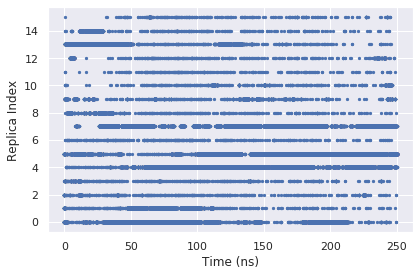

In [123]:
np.random.seed(42)

df = load_history_files(os.path.join(DATA_DIR, "0"), filename_match="trimer_abeta42.job*.sort.history")
df["timestep"] = df["timestep"]*2e-6
df["code"] = np.random.choice(list(range(256)), size=df_0.shape[0])

from_idx = 0
go_to_list = [1, 2, 3, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15]
for i, go_to in enumerate(go_to_list):
    df.loc[(df["code"] == i) & (df["replica_idx"] == from_idx), "replica_idx"] = go_to

    
from_idx = 4
go_to_list = [0, 1, 2, 3, 6, 8, 9, 10, 11, 12, 13, 14, 15]
for i, go_to in enumerate(go_to_list):
    df.loc[(df["code"] == i) & (df["replica_idx"] == from_idx), "replica_idx"] = go_to

from_idx = 13
go_to_list = [0, 1, 2, 3, 4, 5, 6]
for i, go_to in enumerate(go_to_list):
    df.loc[(df["code"] == i) & (df["replica_idx"] == from_idx), "replica_idx"] = go_to
    

plt.figure(figsize=(3.2, 3.2*6/8))
df.plot(kind="scatter", x="timestep", y="replica_idx", marker=".")
plt.xlabel("Time (ns)")
plt.ylabel("Replica Index")
plt.tight_layout()
plt.savefig("coordinate_exchange_replica_0.pdf", dpi=300)

In [116]:
(df["timestep"]*2e-6).max()


250.0

In [33]:
dt.plot?